### Computational Guided Inquiry for PChem (Neshyba)

# Work and Heat

## Introduction

1st law, infinitesimal form:
$$
dU = dq + dw \ \ \ \ (1)
$$


Finding dU from dT and dV, for a single step:
$$ 
dU = C_V dT \ \ \ (2)
$$

PV work for a single step:
$$
dw = -P_{ex}dV \ \ \ \ (3)
$$


Multistep isothermal PV work, and associated heating, for an ideal gas:
$$
w = -n R T ln\bigl ({V_2 \over V_1} \bigr ) \ \ \ \ (4)  
$$

$$
q = +n R T ln\bigl ({V_2 \over V_1}\bigr) \ \ \ \ (5)
$$

$$
V_2 = V_1 e^{-{w \over {nRT}}} \ \ \ \ (6)
$$

Single-step adiabatic expansion of an ideal gas, assuming constant $C_V$:

$$ 
{1 \over T}dT = -{n R \over C_V} {1 \over V}dV \ \ \ \ (7)
$$

Multi-step adiabatic expansion of an ideal gas: the temperature:
$$
T_2 = T_1 \times \bigl ({V_2 \over V_1} \bigr ) ^ {-{nR \over C_V}} \ \ \ \ (8)
$$

Multistep adiabatic expansion of an ideal gas: The pressure:
$$
P_2 = P_1 \times \bigl ({V_2 \over V_1} \bigr ) ^ {-{nR \over C_V} -1} \ \ \ \ (9)
$$


## Learning Goals
1. Carry out calculations associated with various manipulations of ideal gases (expansions, contractions, isochoric, isothermal, adiabatic).
1. Create functions in Python, and verify they are correct.

In [1]:
# Import resources stored in the Pchem Library
%run ../PchemLibrary/ImportResources.ipynb

In [2]:
R = AssignQuantity(8.314,'J/mol/K'); print(R)
n = AssignQuantity(1,'mol'); print(n)

8.314 joule / kelvin / mole
1 mole


### Using $dU=C_V dT$
Using Eq. (2), find the temperature increase in one mole of a monatomic ideal gas when you add 100 J to it.

In [3]:
### BEGIN SOLUTION
C_V = 3/2*R*n; print(C_V)
q = AssignQuantity(100,'J');print(q)
delta_T = q/C_V; print(delta_T)
### END SOLUTION

12.471 joule / kelvin
100 joule
8.018603159329645 kelvin


### Finding the work and heat of a multi-step isothermal expansion of an ideal gas when you know the volumes and temperature
When one mole an ideal diatomic gas in the classical limit is expanded from 10 L to 20 L, at 298 K, find the work and the heat. Eqs. (4-5) should help here. Don't forget that in numpy, "np.log" is the natural log.

In [4]:
### BEGIN SOLUTION
T = AssignQuantity(298,'K')
V1 = AssignQuantity(10,'L')
V2 = AssignQuantity(20,'L')
w = -n*R*T*np.log(V2/V1); print(w)
q = -w; print(q)
### END SOLUTION

-1717.3220464342648 joule
1717.3220464342648 joule


### Finding the new volume of a gas after it's undergone isothermal expansion of known heat & work
Suppose one mole an ideal diatomic gas is expanded isothermally at 298 K, starting at 20 L. Assuming this process absorbed 500 J of heat (which means it did 500 J of work on the surroundings), find the final volume. Don't forget that numpy's version of $e^x$ is np.exp(x). Eq. (6) should help here.

In [5]:
### BEGIN SOLUTION
q = AssignQuantity(500,'J'); print(q)
T = AssignQuantity(298,'K'); print(T)
V2_over_V1 = np.exp(q/(n*R*T)); print(V2_over_V1)
V1 = AssignQuantity(20,'L'); print(V1)
V2 = V1*V2_over_V1; print(V2)
### END SOLUTION

500 joule
298 kelvin
1.2236160891038332 dimensionless
20 liter
24.472321782076666 liter


### % changes in temperature from % changes in volume in a single-step adiabatic expansion 
When one mole an ideal monatomic gas is expanded adiabatically from 10 L to 12 L, starting a t 298 K, what's its % reduction in temperature? Eq. (7) should help.

In [6]:
### BEGIN SOLUTION
dV_over_V = 2/10 * 100
C_V = 3/2*R*n
dT_over_T = -n*R/C_V * dV_over_V; print(dT_over_T)
### END SOLUTION

-13.333333333333332 dimensionless


### Changes in temperature from in a multi-step adiabatic expansion 
When one mole an ideal monatomic gas is expanded adiabatically from 20 L to 40 L, starting at 298 K, what's the final temperature? Eq. (8) should help.

In [7]:
### BEGIN SOLUTION
C_V = 3/2*R*n
nR_over_C_V = n*R/C_V
V2_over_V1 = 40/20
T2_over_T1 = (V2_over_V1)**(-nR_over_C_V);print(T2_over_T1)
T1 = AssignQuantity(298,'K')
T2 = T1*T2_over_T1; print(T2)
### END SOLUTION

0.6299605249474366
187.7282364343361 kelvin


### Functions
Functions in Python are really handy ways to do similar tasks multiple times. You may have already noticed them in our code: we've used one that calculates state spaces ("StateSpace"), and others that calculate partial derivatives ("dF_dx" and "dF_dy"). 

Another example is given below. This function calculates a Boyle isotherm. Its job is to return an array of pressures from V1 to V2 (which you get to specify when you call this function), and another array that corresponds to the pressures at those volumes. 

Since you'll be learning how to make these functions, it's worth paying attention to some syntax issues here. Note the colon at the of the first line, and the indentation of the rest of the lines. Also, some semantics: we call the variables in parentheses in the first line (i.e., *V1*, *V2*, *n*, *R*, and *T*) the *arguments* of the function. We call any variables that follow the word "return" in the last line (in this case, *Varray* and *Parray*) the *results* of the function.

Execute this cell now.

In [8]:
# Defining an isothermal expansion/contraction function
def func_P_isotherm(V1,V2,n,R,T):
    Varray = np.linspace(V1,V2)
    Parray = n*R*T/Varray
    return Varray, Parray

### Pause for analysis
Nothing seemed to happen, right. But it did: Python has stored that function for whenever you want to use it later.

We do this in the cell below. A key point to note about this is that the *names of arguments and results don't have to be the same as what's in the function definition.* That's actually a key strength of functions! In the code below, for example, the line

    V_isotherm, P_isotherm = func_P_isotherm(V1,V2,n,R,T)
    
specifies that the user (you) want the names of the returned volume and pressure arrays to be *V_isotherm* and *P_isotherm*, rather than *Varray* and *Parray*. It doesn't *hurt* to give them the same names -- in this case, the caller has given all the arguments the same names as the function does. It's just not necessary. (Under the hood: the truth is, func_P_isotherm will make its own copies of the arguments when it starts its work, regardless of how the caller named them. And when it's finished its work, the caller will make its own copy of the returned variables, regardless of how the function named them.)

Execute this cell now, and you'll see the results displayed graphically!

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:591: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


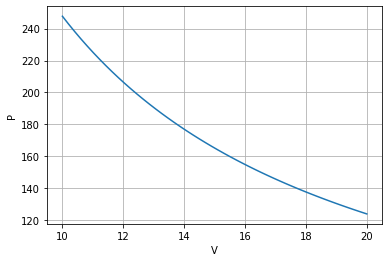

In [9]:
# Using our isothermal expansion function

# Define a temperature
T = AssignQuantity(298,'K')

# Lay out the range of volumes we want
V1 = AssignQuantity(10,'L')
V2 = AssignQuantity(20,'L')

# Make call to our isotherm function
V_isotherm, P_isotherm = func_P_isotherm(V1,V2,n,R,T)

# Plot the results
plt.figure()
plt.plot(V_isotherm, P_isotherm)
plt.xlabel('V')
plt.ylabel('P')
plt.grid(True)

### Your turn
In the cell below, your challenge is to create a function called *func_P_adiabat*. This function's job is to calculate the pressure of an adiabat of a gas whose starting volume is V1, and whose starting temperature is T1; then the gas is expanded until its volume reaches V2 (see Eq. (9) in the Introduction). As it does so, as you know, its pressure and temperature both drop. 

More specifically, give your function the following specifications:
- Make the *arguments* V1, V2, n, R, T1, and C_V (all of which are scalars)
- Make the *results* V2array and P2array (both of which are arrays)

In [10]:
### BEGIN SOLUTION
def func_P_adiabat(V1,V2,n,R,T1,C_V):
    V2array = np.linspace(V1,V2)
    P1 = n*R*T1/V1
    nR_over_C_V = n*R/C_V
    P2array = P1*(V2array/V1)**(-nR_over_C_V-1)
    return V2array, P2array
### END SOLUTION

### Exercising your function
In the cell below, you'll exercise your function. We've set up the first part, actually: all you need to do is make the call to your adiabat function, and graph the results.

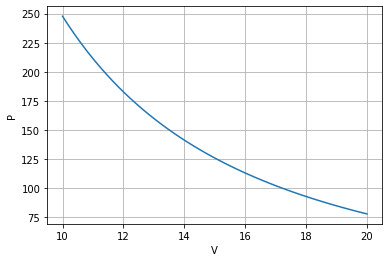

In [11]:
# Heat capacity for a monatomic ideal gas, 1 mole
C_V = 3/2*R*n

# Define the starting temperature
Tstart = AssignQuantity(298,'K')

# Lay out the range of volumes we want
V1 = AssignQuantity(10,'L')
V2 = AssignQuantity(20,'L')

# Call to your adiabat function, naming the returned arrays "V_adiabat" and "P_adiabat"
### BEGIN SOLUTION
V_adiabat, P_adiabat = func_P_adiabat(V1,V2,n,R,Tstart,C_V)
### END SOLUTION

# Plot the results
### BEGIN SOLUTION
plt.figure()
plt.plot(V_adiabat, P_adiabat)
plt.xlabel('V')
plt.ylabel('P')
plt.grid(True)
### END SOLUTION

### Graphing adiabats and isotherms together
It's a bit difficult to tell, from the preceding graphs, how adiabats and isotherms differ. To do that, we need to look at them on the same graph. In the cell below, plot your adiabat ("P_adiabat") and isotherm ("P_isotherm") on the same graph, as a function of their volume arrays ("V_adiabat" and "V_isotherm"). Annotate using the label/legend method.

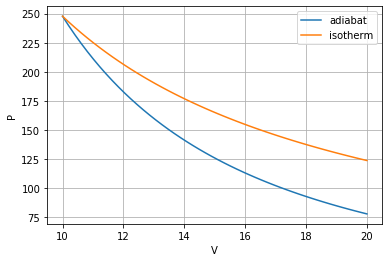

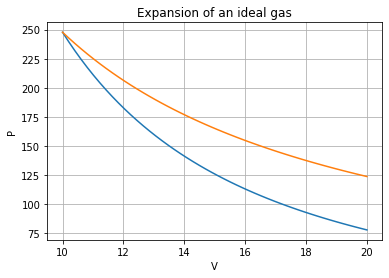

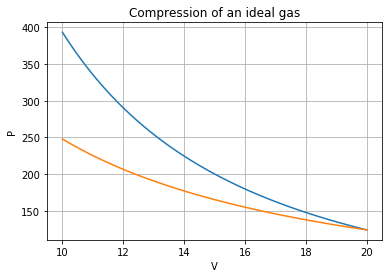

In [12]:
### BEGIN SOLUTION
plt.figure()
plt.plot(V_adiabat, P_adiabat, label='adiabat')
plt.plot(V_isotherm, P_isotherm, label='isotherm')
plt.xlabel('V')
plt.ylabel('P')
plt.grid(True)
plt.legend()

# These are for exploration/exam presentations, not the assignment
plt.figure()
plt.plot(V_adiabat, P_adiabat, label='adiabat')
plt.plot(V_isotherm, P_isotherm, label='isotherm')
plt.xlabel('V')
plt.ylabel('P')
plt.title('Expansion of an ideal gas')
plt.grid(True)

V_adiabat2, P_adiabat2 = func_P_adiabat(V2,V1,n,R,Tstart,C_V)
plt.figure()
plt.plot(V_adiabat2, P_adiabat2, label='adiabat')
plt.plot(V_isotherm, P_isotherm, label='isotherm')
plt.xlabel('V')
plt.ylabel('P')
plt.title('Compression of an ideal gas')
plt.grid(True)

### END SOLUTION

### Refresh/save/validate/close/submit/logout